単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm

# 日本語フォントの設定
jp_font_path = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'  # macOSの場合の日本語フォントパス
jp_font = fm.FontProperties(fname=jp_font_path)

In [2]:
def count_word_frequencies():
    word_counter = Counter()

    with open('neko.txt.mecab', 'r', encoding='utf-8') as infile:
        for line in infile:
            if line == 'EOS\n':
                continue
            
            surface, attr = line.split('\t')
            attr = attr.split(',')
            word_counter[surface] += 1

    return word_counter



In [5]:
def plot_frequency_histogram(word_counter):
    frequencies = list(word_counter.values())

    # ヒストグラムの描画
    plt.figure(figsize=(10, 6))
    plt.hist(frequencies, bins=range(1, max(frequencies) + 1), edgecolor='black', log=True)
    plt.xscale('log')
    plt.xlabel('出現頻度', fontproperties=jp_font)
    plt.ylabel('単語の種類数', fontproperties=jp_font)
    plt.title('単語の出現頻度のヒストグラム（対数スケール）', fontproperties=jp_font)
    plt.show()



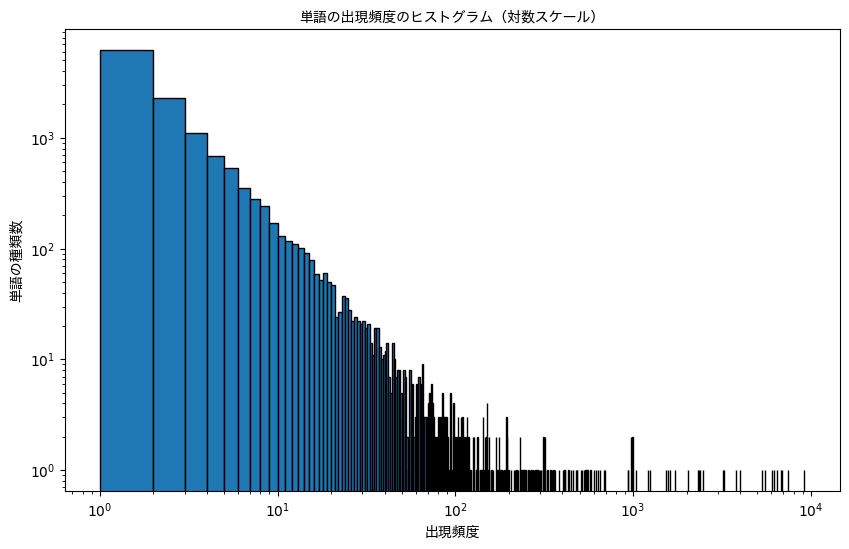

In [6]:
if __name__ == '__main__':
    word_counter = count_word_frequencies()
    plot_frequency_histogram(word_counter)